In [10]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/ML Course/breast_cancer.csv')
dataset.head(9)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2


In [4]:
X = dataset.iloc[:, 1:-1].values # we're not taking the categorical value (Sample code number)
y = dataset.iloc[:, -1].values

# Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the logistic regression model

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicting the test set result

In [11]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
# Reshape both y_pred and y_test to be column vectors and concatenate them side-by-side to see predictions and actual values together in one array.

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


# Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy: ", accuracy_score(y_test, y_pred))

[[84  3]
 [ 3 47]]
accuracy:  0.9562043795620438


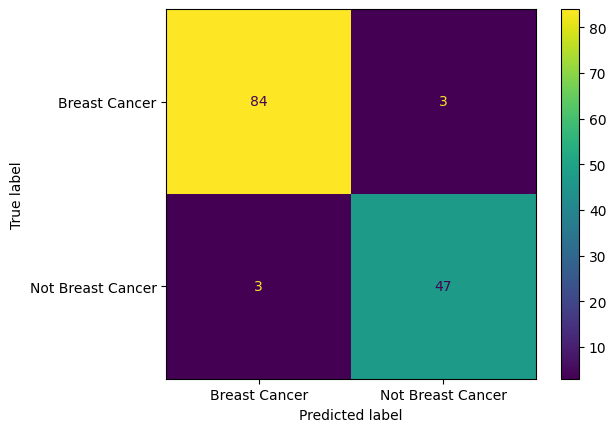

In [14]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Breast Cancer", "Not Breast Cancer"]).plot()

> * TP = 84
* FP = 3
* FN = 3
* TN = 47

The accuracy is: **95%**

# Computing the accuracy with k-Fold cross validation

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %
